In [763]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn import preprocessing
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [764]:
#importing the dataset and doing preprocessing...
header_list = ["Gender", "Symptoms", "Alcohol", "Hepatitis B Surface Antigen", "Hepatitis B e Antigen", "Hepatitis B Core Antibody", "Hepatitis C Virus Antibody",
"Cirrhosis", "Endemic Countries", "Smoking", "Diabetes", "Obesity", "Hemochromatosis", "Arterial Hypertension", "Chronic Renal Insufficiency",
"Human Immunodeficiency Virus", "Nonalcoholic Steatohepatitis", "Esophageal Varices", "Splenomegaly", "Portal Hypertension", "Portal Vein Thrombosis", "Liver Metastasis",
"Radiological Hallmark", "Age at diagnosis", "Grams of Alcohol per day", "Packs of cigarets per year", "Performance Status", "Encefalopathy degree", "Ascites degree",
"International Normalised Ratio", "Alpha-Fetoprotein", "Haemoglobin", "Mean Corpuscular Volume", "Leukocytes", "Platelets", "Albumin", "Total Bilirubin",
"Alanine transaminase", "Aspartate transaminase", "Gamma glutamyl transferase", "Alkaline phosphatase", "Total Proteins", "Creatinine", "Number of Nodules",
"Major dimension of nodule", "Direct Bilirubin", "Iron", "Oxygen Saturation", "Ferritin", "Class"]

dataset = pd.read_csv("hcc-data.txt", names = header_list)
dataset = dataset.replace({'?': np.nan})
for col in dataset:
  dataset[col]=dataset[col].astype(np.float)
dataset['Class']=dataset['Class'].astype(np.int)
#print(type(dataset['Class'][0]))
#print(dataset.mean())
#Handling missing values...
dataset = dataset.fillna(dataset.mean())
#print(dataset['Class'])
dataset.head()

,Gender,Symptoms,Alcohol,Hepatitis B Surface Antigen,Hepatitis B e Antigen,Hepatitis B Core Antibody,Hepatitis C Virus Antibody,Cirrhosis,Endemic Countries,Smoking,Diabetes,Obesity,Hemochromatosis,Arterial Hypertension,Chronic Renal Insufficiency,Human Immunodeficiency Virus,Nonalcoholic Steatohepatitis,Esophageal Varices,Splenomegaly,Portal Hypertension,Portal Vein Thrombosis,Liver Metastasis,Radiological Hallmark,Age at diagnosis,Grams of Alcohol per day,Packs of cigarets per year,Performance Status,Encefalopathy degree,Ascites degree,International Normalised Ratio,Alpha-Fetoprotein,Haemoglobin,Mean Corpuscular Volume,Leukocytes,Platelets,Albumin,Total Bilirubin,Alanine transaminase,Aspartate transaminase,Gamma glutamyl transferase,Alkaline phosphatase,Total Proteins,Creatinine,Number of Nodules,Major dimension of nodule,Direct Bilirubin,Iron,Oxygen Saturation,Ferritin,Class
0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,1.0,0.129032,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,67.0,137.0,15.000000,0.0,1.0,1.0,1.530000,95.000000,13.700000,106.600000,4.900000,99.000000,3.400000,2.100000,34.000000,41.000000,183.000000,150.000000,7.100000,0.700000,1.0,3.5,0.50,85.598837,37.028941,438.997647,1
1,0.0,0.639456,0.0,0.0,0.0,0.0,1.0,1.0,0.079365,0.508065,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,62.0,0.0,20.464286,0.0,1.0,1.0,1.421851,19299.951146,12.879012,95.119753,1473.961549,113206.442654,3.445535,3.087938,67.093168,96.382716,268.026543,212.211605,8.961039,1.127089,1.0,1.8,1.93,85.598837,37.028941,438.997647,1
2,1.0,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.000000,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,78.0,50.0,50.000000,2.0,1.0,2.0,0.960000,5.800000,8.900000,79.800000,8.400000,472.000000,3.300000,0.400000,58.000000,68.000000,202.000000,109.000000,7.000000,2.100000,5.0,13.0,0.10,28.000000,6.000000,16.000000,1
3,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,77.0,40.0,30.000000,0.0,1.0,1.0,0.950000,2440.000000,13.400000,97.100000,9.000000,279.000000,3.700000,0.400000,16.000000,64.000000,94.000000,174.000000,8.100000,1.110000,2.0,15.7,0.20,85.598837,37.028941,438.997647,0
4,1.0,1.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.000000,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,76.0,100.0,30.000000,0.0,1.0,1.0,0.940000,49.000000,14.300000,95.100000,6.400000,199.000000,4.100000,0.700000,147.000000,306.000000,173.000000,109.000000,6.900000,1.800000,1.0,9.0,1.93,59.000000,15.000000,22.000000,1


In [765]:
#splits dataset into train, test in ratio 80:20 and does normalization on data
def train_test_split(s_dataset):
    features = s_dataset.columns
    k = int(len(s_dataset.index)*0.8)
    training_data = s_dataset.iloc[:k].reset_index(drop=True)
    testing_data = s_dataset.iloc[k:].reset_index(drop=True)
    scalar = preprocessing.StandardScaler()
    training_data = scalar.fit_transform(training_data)
    testing_data = scalar.transform(testing_data)
    return pd.DataFrame(data = training_data, columns = features), pd.DataFrame(data = testing_data, columns = features)

In [766]:
# splitting into train_X, train_Y, test_X, test_Y
dataset = dataset.sample(frac = 1, random_state = 0).reset_index(drop = True)
training_data,testing_data = train_test_split(dataset)
train_X = copy.deepcopy(training_data)
train_X = train_X.drop(['Class'], axis = 1)
train_Y = copy.deepcopy(training_data)
train_Y = train_Y['Class']
for i in range(len(train_Y)):
  if train_Y[i]>0:
    train_Y[i]=1
  else:
    train_Y[i]=0
test_X = copy.deepcopy(testing_data)
test_X = test_X.drop(['Class'], axis = 1)
test_Y = copy.deepcopy(testing_data)
test_Y = test_Y['Class']
for i in range(len(test_Y)):
  if test_Y[i]>0:
    test_Y[i]=1
  else:
    test_Y[i]=0

In [767]:
#binary svm classifier
c_values = [0.25, 0.5, 0.75, 1, 2, 4, 8]
acc_linear = []
acc_quadratic = []
acc_rbf = []
for x in c_values:
  clf = svm.SVC(C = x, kernel = 'linear')
  clf = clf.fit(train_X,train_Y)
  print("Train set accuracy for linear kernel with C = " + str(x) + " is = " + str(clf.score(train_X,train_Y)))
  print("Test set accuracy for linear kernel with C = " + str(x) + " is = " + str(clf.score(test_X,test_Y)))
  acc_linear.append(clf.score(test_X,test_Y))
#plt.plot(c_values,acc_linear)
#plt.show()
for x in c_values:
  clf = svm.SVC(C = x, kernel = 'poly', degree = 2)
  clf = clf.fit(train_X,train_Y)
  print("Train set accuracy for quadratic kernel with C = " + str(x) + " is = " + str(clf.score(train_X,train_Y)))
  print("Test set accuracy for quadratic kernel with C = " + str(x) + " is = " + str(clf.score(test_X,test_Y)))
  acc_quadratic.append(clf.score(test_X,test_Y))
#plt.plot(c_values,acc_quadratic)
#plt.show()
for x in c_values:
  clf = svm.SVC(C = x, kernel = 'rbf')
  clf = clf.fit(train_X,train_Y)
  print("Train set accuracy for radial basis kernel with C = " + str(x) + " is = " + str(clf.score(train_X,train_Y)))
  print("Test set accuracy for radial basis function kernel with C = " + str(x) + " is = " + str(clf.score(test_X,test_Y)))
  acc_rbf.append(clf.score(test_X,test_Y))
#plt.plot(c_values,acc_rbf)
#plt.show()

Train set accuracy for linear kernel with C = 0.25 is = 0.9166666666666666
Test set accuracy for linear kernel with C = 0.25 is = 0.6666666666666666
Train set accuracy for linear kernel with C = 0.5 is = 0.9242424242424242
Test set accuracy for linear kernel with C = 0.5 is = 0.6666666666666666
Train set accuracy for linear kernel with C = 0.75 is = 0.946969696969697
Test set accuracy for linear kernel with C = 0.75 is = 0.6363636363636364
Train set accuracy for linear kernel with C = 1 is = 0.9545454545454546
Test set accuracy for linear kernel with C = 1 is = 0.5454545454545454
Train set accuracy for linear kernel with C = 2 is = 0.9621212121212122
Test set accuracy for linear kernel with C = 2 is = 0.5757575757575758
Train set accuracy for linear kernel with C = 4 is = 0.9772727272727273
Test set accuracy for linear kernel with C = 4 is = 0.5757575757575758
Train set accuracy for linear kernel with C = 8 is = 0.9696969696969697
Test set accuracy for linear kernel with C = 8 is = 0.5

# MLP

In [768]:
archs=[(),(2,),(6,),(2,3),(3,2)]
lrs=[0.1,0.01,0.001,0.0001,0.00001]
print(type(archs[0]))


<class 'tuple'>


In [769]:
@ignore_warnings(category=ConvergenceWarning)
def plot(archs,lrs,train_X,train_Y,test_X,test_Y):
  i=0
  best_lr=0.1
  best_arc=()
  best_acc=0
  for arc in archs:
    print(type(arc))
    i+=1
    yaxis=[]
    j=0
    for lr in lrs:
      j+=1
      classifier = MLPClassifier(hidden_layer_sizes=arc ,learning_rate_init=lr,max_iter=100,activation = 'logistic',solver='sgd',random_state=1,nesterovs_momentum=False)
      classifier.fit(train_X, train_Y)
      y_pred = classifier.predict(test_X)
      acc=classifier.score(test_X,test_Y)
      if best_acc< acc:
        best_lr=lr
        best_arc=arc
        best_acc=acc
      yaxis.append(acc*100)
    fig = plt.figure()
    plt.plot(lrs,yaxis)
    # print('highest accuracy = ',max(yaxis))
    fig.suptitle('Architecture: hidden layer sizes:'+str(arc)+'\nhighest accuracy = '+str(max(yaxis)), fontsize=13)
    plt.xlabel('learning rate', fontsize=13)
    plt.ylabel('accuracy', fontsize=13)
    plt.xscale("log")
    fig.savefig('arch'+str(i)+'.jpg') 
    
  return best_acc,best_arc,best_lr 


<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


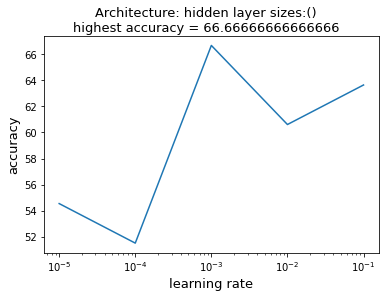

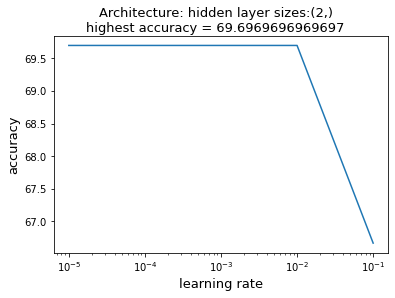

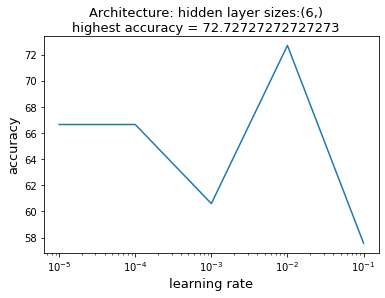

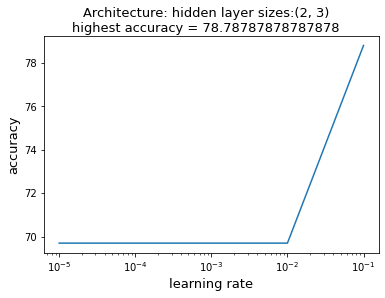

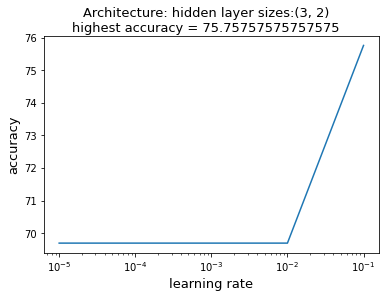

In [770]:
best_acc,best_arc,best_lr=plot(archs,lrs,train_X,train_Y,test_X,test_Y)


In [771]:
print('Best model:\nBest accuracy = ',best_acc*100,'\nArchitecture: hidden layers:',len(best_arc),'\n              hidden layer sizes',best_arc,'\nlearning rate: ',best_lr)

Best model:
Best accuracy =  78.78787878787878 
Architecture: hidden layers: 2 
              hidden layer sizes (2, 3) 
learning rate:  0.1


In [772]:
classifier = MLPClassifier(hidden_layer_sizes=best_arc ,learning_rate_init=best_lr,max_iter=100,activation = 'logistic',solver='sgd',random_state=1,nesterovs_momentum=False)
classifier.get_params()

{'activation': 'logistic',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (2, 3),
 'learning_rate': 'constant',
 'learning_rate_init': 0.1,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': False,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}